In [766]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
  
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10, 10)

In [767]:

df = pd.read_csv('diabetes.csv') 

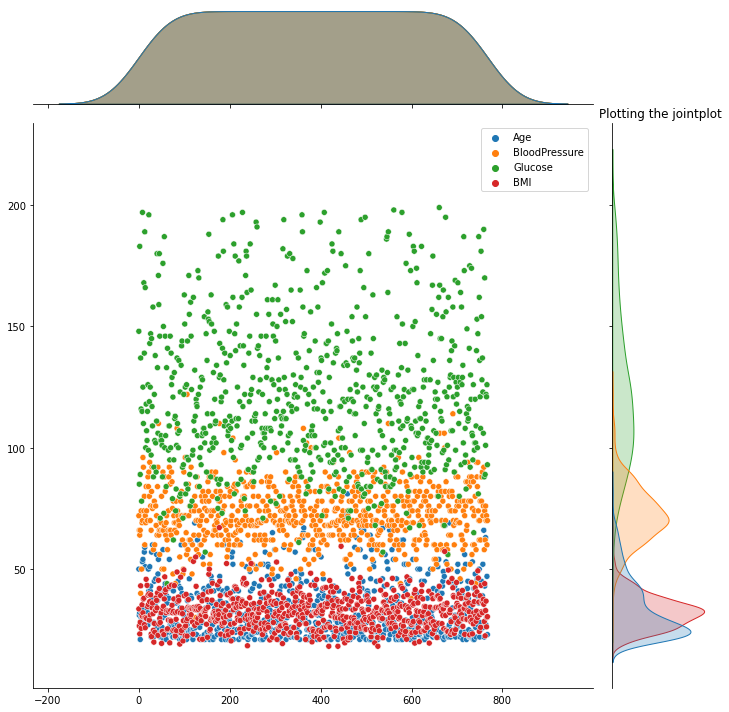

In [843]:
sns.jointplot(data=df[['Age','BloodPressure', 'Glucose','BMI']],height=10, ratio=5, color="r")
plt.title("Plotting the jointplot")
plt.show()

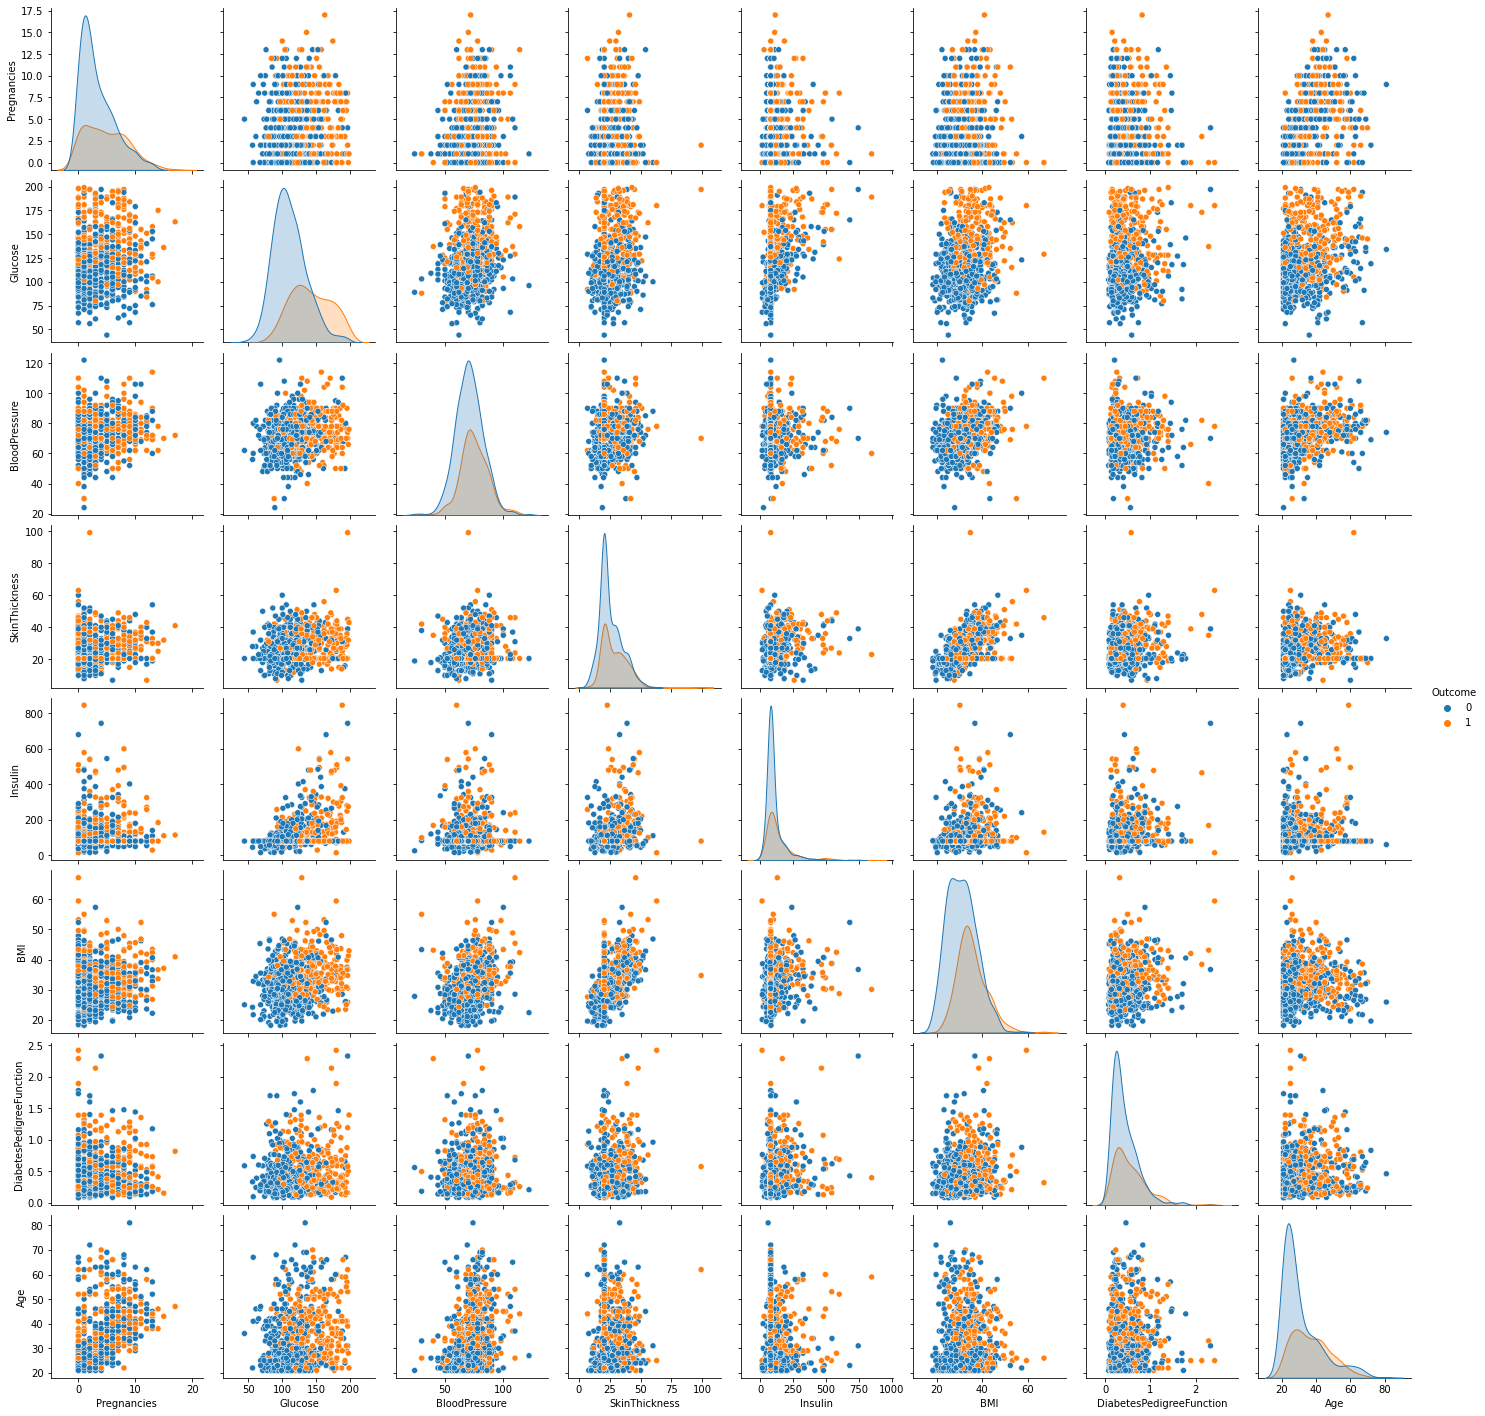

In [845]:
sns.pairplot(df,hue='Outcome')
plt.show()

In [768]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [769]:
df.shape

(768, 9)

In [770]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [771]:
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

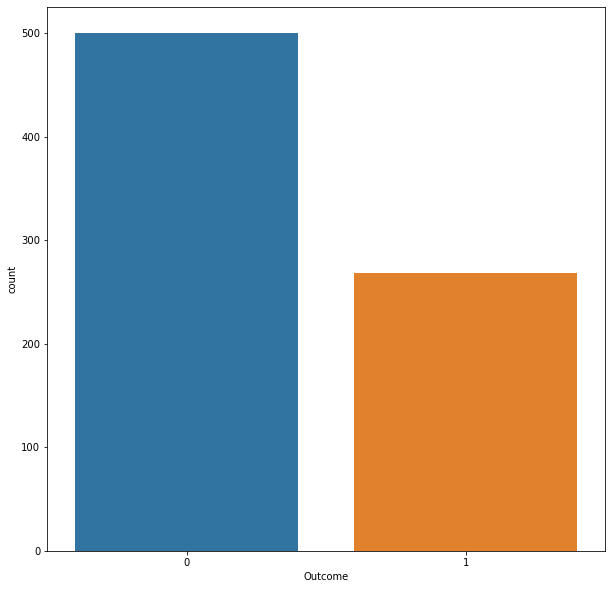

In [772]:
sns.countplot(x = 'Outcome',data = df)

In [773]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [774]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
#df['Age'] = df['Age'].replace(0,df['Age'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
#df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean())

In [775]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [776]:
#dividing dataset into features and outcome
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [777]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [778]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [779]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [780]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [781]:
#splitting training and testing 75%
from sklearn.model_selection import train_test_split

In [782]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.30,random_state=None)

In [783]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
46,1,146.0,56.0,20.536458,79.799479,29.7,0.564,29
48,7,103.0,66.0,32.000000,79.799479,39.1,0.344,31
456,1,135.0,54.0,20.536458,79.799479,26.7,0.687,62
83,0,101.0,65.0,28.000000,79.799479,24.6,0.237,22
335,0,165.0,76.0,43.000000,255.000000,47.9,0.259,26
...,...,...,...,...,...,...,...,...
21,8,99.0,84.0,20.536458,79.799479,35.4,0.388,50
219,5,112.0,66.0,20.536458,79.799479,37.8,0.261,41
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43
151,4,114.0,65.0,20.536458,79.799479,21.9,0.432,37


In [784]:
Y_train

46     0
48     1
456    0
83     0
335    0
      ..
21     0
219    1
761    1
151    0
76     0
Name: Outcome, Length: 537, dtype: int64

In [785]:
#standardising data using standard scaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [786]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [787]:
X_train_std

array([[-0.853528  ,  0.79142462, -1.31608088, ..., -0.37979347,
         0.23182441, -0.36743323],
       [ 0.95097805, -0.61191909, -0.51923985, ...,  1.01020482,
        -0.4295873 , -0.19929378],
       [-0.853528  ,  0.43242971, -1.47544909, ..., -0.82340995,
         0.60161369,  2.4068677 ],
       ...,
       [ 1.55248007,  1.57468622,  0.11823298, ...,  1.7347784 ,
        -0.2522087 ,  0.80954292],
       [ 0.04872502, -0.25292419, -0.59892395, ..., -1.53319631,
        -0.16502261,  0.30512457],
       [ 0.95097805, -1.94999101,  0.43696939, ...,  0.04903579,
        -0.28828571,  0.64140347]])

In [788]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [789]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [790]:
Y_pred=lr.predict(X_test_std)

In [791]:
Y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [792]:
Y_test

296    1
258    0
618    1
321    1
355    1
      ..
735    0
422    0
30     0
346    0
69     0
Name: Outcome, Length: 231, dtype: int64

In [793]:
from sklearn.metrics import accuracy_score

In [794]:
accuracy_score(Y_test,Y_pred) * 100

76.19047619047619

In [795]:
#dECITION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [797]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [798]:
Y_pred=dt.predict(X_test_std)

In [799]:
Y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [800]:
Y_test

296    1
258    0
618    1
321    1
355    1
      ..
735    0
422    0
30     0
346    0
69     0
Name: Outcome, Length: 231, dtype: int64

In [801]:
accuracy_score(Y_test,Y_pred)*100

67.09956709956711

In [802]:
#support vector machine
classifier = svm.SVC(kernel='linear')

In [803]:
classifier.fit(X_train_std,Y_train)

SVC(kernel='linear')

In [804]:
Y_pred=classifier.predict(X_test_std)

In [805]:
Y_pred


array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [806]:
Y_test

296    1
258    0
618    1
321    1
355    1
      ..
735    0
422    0
30     0
346    0
69     0
Name: Outcome, Length: 231, dtype: int64

In [807]:
accuracy_score(Y_test,Y_pred)*100

75.32467532467533

Confusion matrix : 
 [[ 41  40]
 [ 17 133]]
Outcome values : 
 41 40 17 133
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.51      0.59        81
           0       0.77      0.89      0.82       150

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



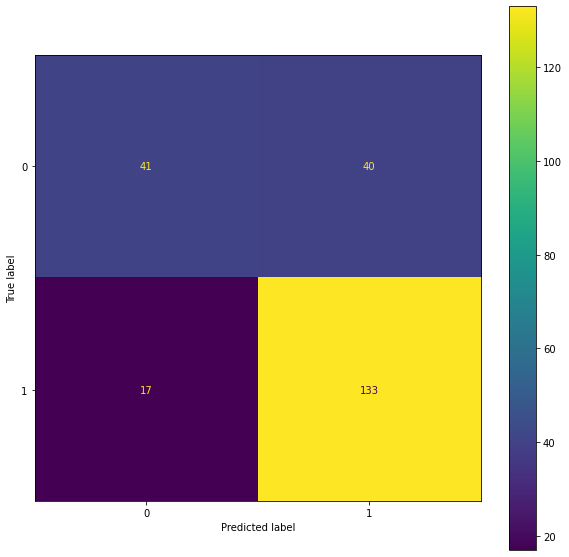

In [808]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay 
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)
cm = confusion_matrix(Y_test, Y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [809]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")


In [810]:
rf_model.fit(X_train_std,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [811]:
Y_pred=rf_model.predict(X_test_std)

In [812]:
Y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [813]:
Y_test

296    1
258    0
618    1
321    1
355    1
      ..
735    0
422    0
30     0
346    0
69     0
Name: Outcome, Length: 231, dtype: int64

In [814]:
accuracy_score(Y_test,Y_pred)*100

73.59307359307358

In [815]:
#kmeans
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train_std,Y_train)

KMeans(n_clusters=2, random_state=0)

In [816]:
Y_pred=KMeans_Clustering.predict(X_test_std)

In [817]:
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [818]:
Y_test

296    1
258    0
618    1
321    1
355    1
      ..
735    0
422    0
30     0
346    0
69     0
Name: Outcome, Length: 231, dtype: int64

In [819]:
accuracy_score(Y_test,Y_pred)*100

71.42857142857143

<AxesSubplot:>

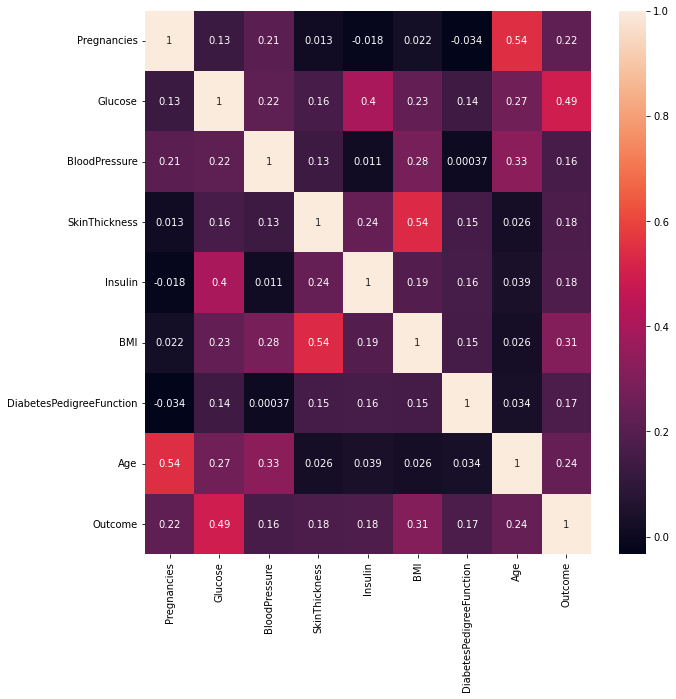

In [820]:
img=sns.heatmap(df.corr(), annot = True)
img

In [821]:
#new data with reduced features taken from heatmap
K = X.iloc[:, [0,1,2,5,7]].values
Z = df.iloc[:, 8].values

In [822]:
print(K)

[[  6.  148.   72.   33.6  50. ]
 [  1.   85.   66.   26.6  31. ]
 [  8.  183.   64.   23.3  32. ]
 ...
 [  5.  121.   72.   26.2  30. ]
 [  1.  126.   60.   30.1  47. ]
 [  1.   93.   70.   30.4  23. ]]


In [823]:
#new data splitting into test and train
K_train , K_test , Z_train , Z_test = train_test_split(K,Z,test_size=0.20,random_state=None)

In [824]:
#new data standardizing
std1=StandardScaler()
K_train_std=std1.fit_transform(K_train)
K_test_std=std1.transform(K_test)

In [825]:
#kmeans for new data reducing features to improve accuracy
KMeans_Clustering1 = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering1.fit(K_train_std,Z_train)

KMeans(n_clusters=2, random_state=0)

In [826]:
Y_pred=KMeans_Clustering1.predict(K_test_std)

In [827]:
Y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [828]:
accuracy_score(Z_test,Y_pred)*100

72.72727272727273

In [829]:
#testing new data with svm
classifier1 = svm.SVC(kernel='linear')

In [830]:
classifier1.fit(K_train_std,Z_train)

SVC(kernel='linear')

In [831]:
Y_pred=classifier1.predict(K_test_std)

In [832]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [833]:

accuracy_score(Z_test,Y_pred)*100

77.92207792207793

In [834]:
lr1=LogisticRegression()
lr1.fit(K_train_std,Z_train)


LogisticRegression()

In [835]:
Y_pred=lr1.predict(K_test_std)


In [836]:

accuracy_score(Z_test,Y_pred) * 100

79.22077922077922

In [837]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(K_train_std,Z_train)
Y_pred=rf_model1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

78.57142857142857

Confusion matrix : 
 [[41 23]
 [10 80]]
Outcome values : 
 41 23 10 80
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.64      0.71        64
           0       0.78      0.89      0.83        90

    accuracy                           0.79       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.79      0.79      0.78       154



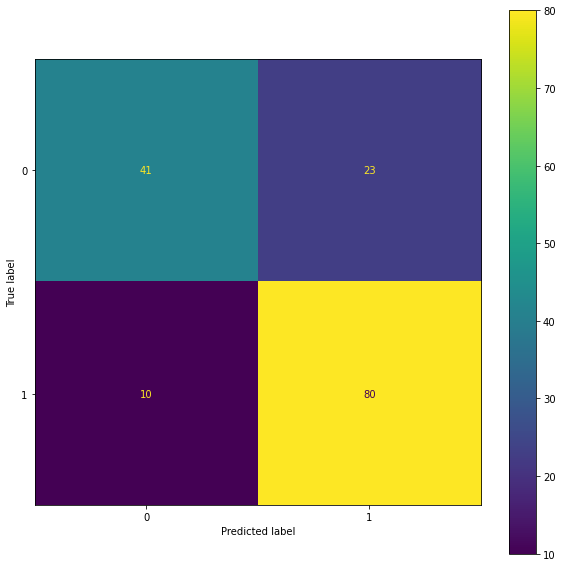

In [838]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay 
matrix = confusion_matrix(Z_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Z_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Z_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)
cm = confusion_matrix(Z_test, Y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model1.classes_)
disp.plot()
plt.show()

In [839]:
dt1=DecisionTreeClassifier()
dt1.fit(K_train_std,Z_train)
Y_pred=dt1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

69.48051948051948

In [840]:
#predicting using best accuracy
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = rf_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.34947603  1.44414262 -0.04113523 -0.77776327  0.56282052 -0.95649489
   0.300972    1.48210072]]
[1]
The person is diabetic


c:\Users\atulv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [841]:
pickle.dump(classifier, open('classifier.pkl', 'wb'))
pickle.dump(std,open('std.pkl','wb'))
pickle.dump(rf_model,open('randomforest.pkl','wb') )
pickle.dump(lr,open('logistic.pkl','wb') )
pickle.dump(dt,open('decition.pkl','wb') )
pickle.dump(classifier1, open('classifier1.pkl', 'wb'))
pickle.dump(std1,open('std1.pkl','wb'))
pickle.dump(rf_model1,open('randomforest1.pkl','wb') )
pickle.dump(lr1,open('logistic1.pkl','wb') )
pickle.dump(dt1,open('decition1.pkl','wb') )
